# Table of Contents

1. Understanding Business Case
2. Data Understanding
3. Data Cleaning
4. Data Visualization
5. Data preprocessing
6. Building models & Evaluation
7. Model deployment

# 1. Introduction - Loan Default Prediction

The loan approval process is  a  challenging task for any financial institution. Before  giving credit loans to borrowers, the bank decides whether the borrower is bad (defaulter) or good (non-defaulter). This project focuses on developing  Machine  Learning  (ML)  models  to  predict  loan eligibility,  which  is  vital  in  accelerating  the  decision-making process and  determining if  an  applicant  gets  a  loan  or  not. 

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

The dataset used in this project is the historical dataset 'Loan Eligible Dataset,' available on [Kaggle](https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset).



The dataset consists of the following variables:

- Loan_ID : Unique Loan ID
- Gender : Male/ Female
- Married : Applicant married (Y/N)
- Dependents : Number of dependents 
- Education : Applicant Education (Graduate/ Under Graduate)
- Self_Employed : Self employed (Y/N)
- ApplicantIncome : Applicant income
- CoapplicantIncome : Coapplicant income
- LoanAmount : Loan amount in thousands of dollars
- Loan_Amount_Term : Term of loan in months
- Credit_History : credit history meets guidelines yes or no
- Property_Area : Urban/ Semi Urban/ Rural
- Loan_Status : Loan approved (Y/N) this is the target variable

This is a classification problem in which we need to classify whether the loan will be approved or not. Loan status can have two values: Yes or NO.

Yes: if the loan is approved

No: if the loan is not approved

## Objective of the project

- Analyze customer data provided in data set (EDA)
- Build various ML models that can predict loan approval

## The ML models used in the project

- Logistic Regression
- Random Forest


# 2. Data Understanding

To solve this problem, we have three CSV files: train, test, and sample submission.

- Train file will be used for training the model.It contains all the independent variables and the target variable.
- Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.


In [1]:
!pip3 install imblearn

In [2]:
#import the necessary libraries 
import pandas as pd #data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt #data plot
%matplotlib inline 
import seaborn as sns #data plot
import warnings
warnings.filterwarnings("ignore") #ignore warning

In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [4]:
# load and read the dataset
loan_train = pd.read_csv("C://Users//Admin//Downloads//loan-train.csv")
loan_test = pd.read_csv("C://Users//Admin//Downloads//loan-test.csv")

In [5]:
#Lets display the some few information from our large datasets
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
#Check the size of train/test dataset
print("The size of train dataset is: ", loan_train.shape)
print("The size of test dataset is: ", loan_test.shape)


The size of train dataset is:  (614, 13)
The size of test dataset is:  (367, 12)


We have 12 independent variables and 1 target variable (Loan_Status) in the training dataset.
We have similar features in the test dataset as the training dataset except for the Loan_Status. 
We need to predict the test dataset using the training dataset. 

In [8]:
# check the data types of variable in the dataset. 
loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are 3 data formats in the dataset including: 
- object: Object format mentions categorical variables. Categorical variables in this dataset are Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status, Credit_History. 
- int64: int64 format mentions the integer variables. In this dataset, only ApplicantIncome is int64 format
- float64: It represents the variable that has some decimal values involved. CoapplicantIncome, LoanAmount, Loan_Amount_Term  belong to this format.

Besides data format, these variables can be divided into different types: 
- Categorical nominal features: These features have categories (Gender, Married, Self_Employed, Credit_History (being preprocessed), Loan_Status)
- Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
- Numerical features: These features have numerical values (ApplicantIncome, Co-applicantIncome, LoanAmount, Loan_Amount_Term)

# 3. Data Cleaning

**Drop unwanted columns**

Loan_ID doesnt bring any values for modeling and prediction, therefore, we will drop it from both train and test dataset. 

In [9]:
loan_train.drop(['Loan_ID'],axis=1,inplace=True) # Delete Loan_ID from training dataset 


**Identify missing values**

We are going to be checking if there are NULL values present in our data. We see that there are quite a few null values present.

In [10]:
loan_train.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

The Credit History is the feature with the most missing data, 50 out of 614 followed by the Self Employed, and Loan Amount.

In [11]:
loan_test.isna().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

**Imputing missing values in train and test**

As we can see here, there are many columns missing with small amount of null values so we use mean amd mode to replace with NaN values.
- For categorical variables, we will replace NaN values with mode. This can apply with Credit_History,Self_Employed, Gender, Dependents, Married. 
- For numerical variables, we will replace NaN values with mean. This can apply with LoanAmount, Loan_Amount_Term  

In [12]:
#Fill nan values of categorical variables. 
loan_train["Gender"].fillna(loan_train["Gender"].mode()[0], inplace=True)
loan_test["Gender"].fillna(loan_test["Gender"].mode()[0], inplace=True)
loan_train["Married"].fillna(loan_train["Married"].mode()[0], inplace=True)

loan_train["Dependents"].fillna(loan_train["Dependents"].mode()[0], inplace=True)
loan_test["Dependents"].fillna(loan_test["Dependents"].mode()[0], inplace=True)
loan_train["Self_Employed"].fillna(loan_train["Self_Employed"].mode()[0], inplace=True)
loan_test["Self_Employed"].fillna(loan_test["Self_Employed"].mode()[0], inplace=True)
loan_train["Credit_History"].fillna(loan_train["Credit_History"].mode()[0], inplace=True)
loan_test["Credit_History"].fillna(loan_test["Credit_History"].mode()[0], inplace=True)

In [13]:
#Fill nan values of numeric variables. 
loan_train["LoanAmount"].fillna(loan_train["LoanAmount"].median(), inplace=True)
loan_test["LoanAmount"].fillna(loan_test["LoanAmount"].median(), inplace=True)
loan_train["Loan_Amount_Term"].fillna(loan_train["Loan_Amount_Term"].median(), inplace=True)
loan_test["Loan_Amount_Term"].fillna(loan_test["Loan_Amount_Term"].median(), inplace=True)

In [14]:
#let's check null values again
loan_train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
loan_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

**General understanding of dataset using describe()**

In [16]:
loan_train.describe(include="all")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,145.752443,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.107233,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


In [17]:
loan_test.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,367,367,367,367,367,367.000000,367.000000,367.000000,367.000000,367.000000,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP002329,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban
freq,1,297,233,210,283,330,NaN,NaN,NaN,NaN,NaN,140
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,135.980926,342.822888,0.839237,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,60.959739,64.658402,0.367814,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,101.000000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,157.500000,360.000000,1.000000,NaN


We can perform some **feature engineering** to combine or derive new features. For this dataset, I will create a new feature called Total Income combining the ApplicantIncome and CoapplicantIncome because some people might have a low income but strong CoappliantIncome so a good idea is to combine them. 

In [18]:
loan_train["Total Income"]= loan_train["ApplicantIncome"] + loan_train["CoapplicantIncome"]
loan_test["Total Income"]= loan_test["ApplicantIncome"] + loan_test["CoapplicantIncome"]
loan_train["Total Income"].head()

0    5849.0
1    6091.0
2    3000.0
3    4941.0
4    6000.0
Name: Total Income, dtype: float64

And now I will add a new column from Loan_Status into nemeric format in training set to make convenience for visualization in the next part. 

In [19]:
loan_train["Loan Status"] = loan_train["Loan_Status"].replace({"Y": 1, "N": 0})
loan_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income,Loan Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,1


# 4. Explanatory data analysis (EDA)

## Univariate Analysis

 Now let’s visualize the data

In [20]:
loan_train["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

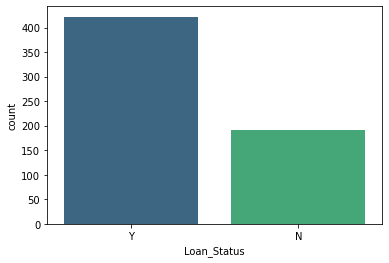

In [21]:
sns.countplot(x="Loan_Status", data=loan_train, palette="viridis")
plt.show()

Taking a look at the countplot, we get an understanding that most of the target variable in training dataset is loan approval. More than 68% are loan approval and nearly 32% of them are loan disapproval.  Therefore, we are dealing with an imbalanced dataset, and care must be taken when using various machine learning models for predictions.

**Univariate Analysis for categorical variables**

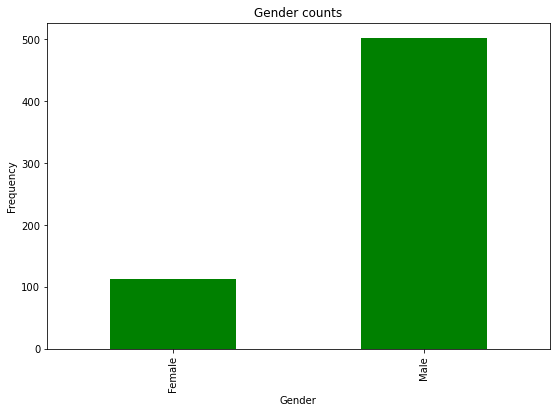

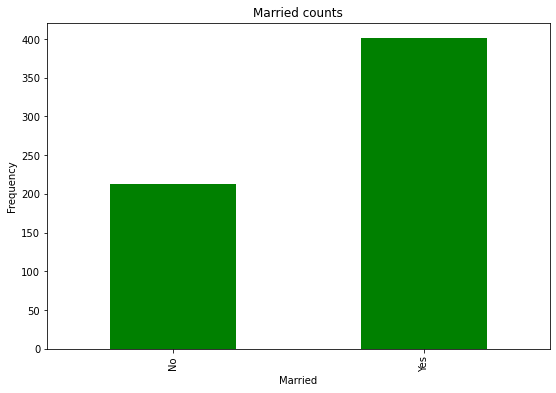

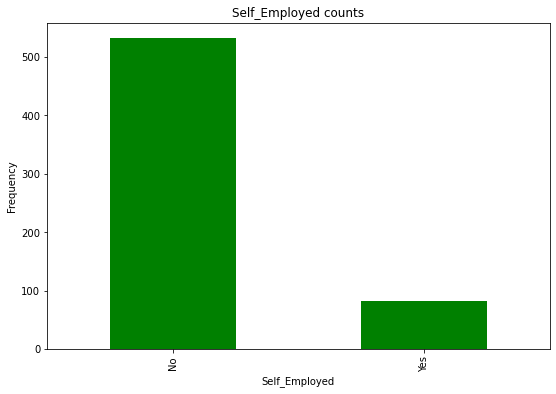

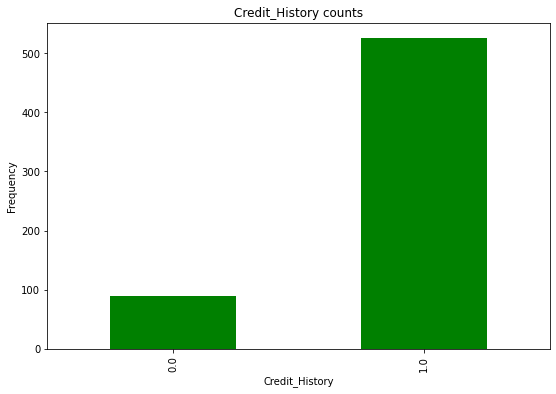

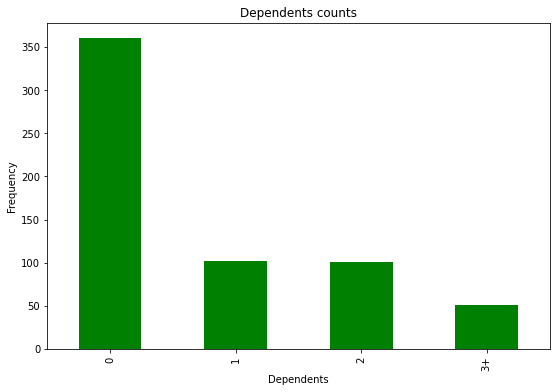

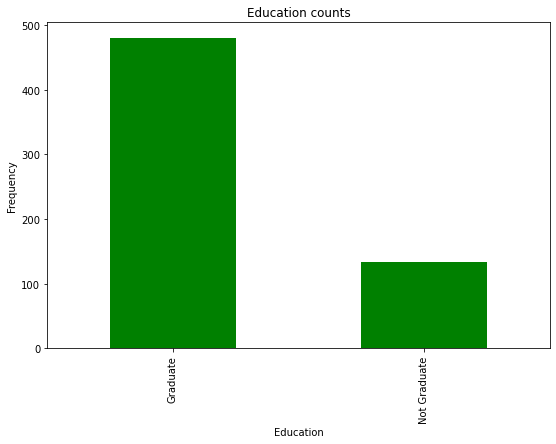

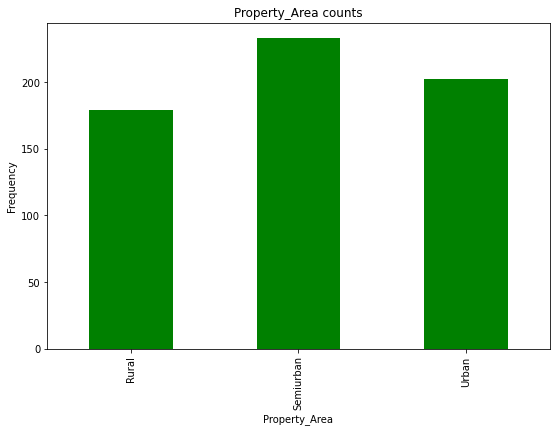

In [22]:
categorical_features = loan_train[["Gender", "Married", "Self_Employed", "Credit_History", "Dependents", "Education", "Property_Area"]]
#plot a bar chart for each categorical feature
for col in categorical_features:
    fig=plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = loan_train[col]
    counts = loan_train[col].value_counts().sort_index()
    counts.plot.bar(ax = ax, color="green")
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


- 80% of applicants are men;
- Around 80% are self-employed;
- 65% are married;
- 84% repaid his debts.
- A large part of the applicants have no dependents;
- Most of the applicants are graduated;
- Most of the applicants are from the semi-urban area

**Univariate Analysis for numeric variables**

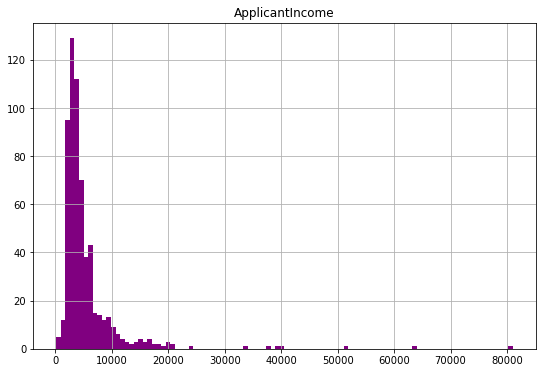

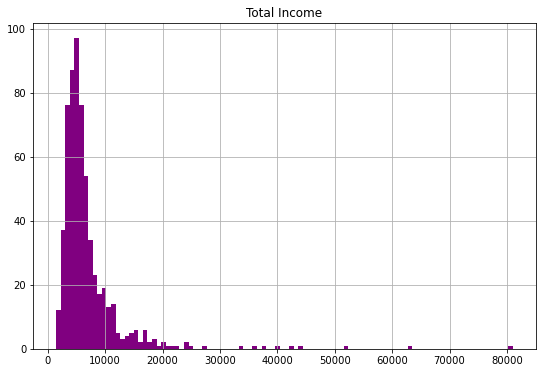

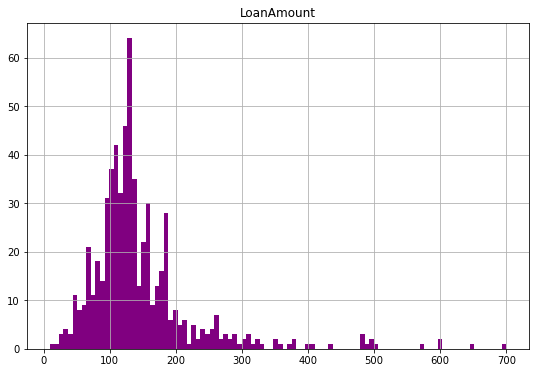

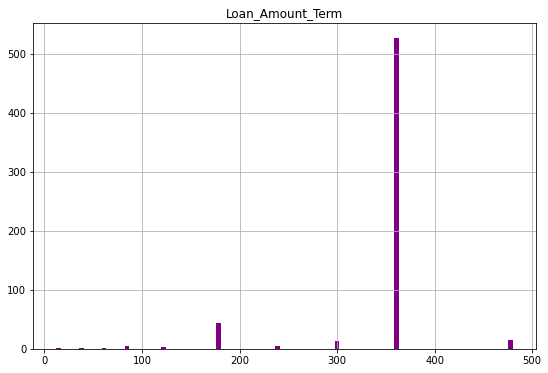

In [23]:
numeric_features = loan_train[["ApplicantIncome", "Total Income", "LoanAmount", "Loan_Amount_Term"]]

# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = loan_train[col]
    feature.hist(bins=100, ax = ax, color="purple")
    ax.set_title(col)
plt.show()


- Income distribution is highly right skewed, so most the applicant have an income below 20,000 USD.
- Total income distribution is also very right skewed, which means that co-applicant income doesnt affects income much more. 
- The Loan Amount is by far more normally distributed, with a mean of roughly 150,000 USD. 
- The Loan Amount Term is the number of months the loan will be paid. Loans were paid in 360 months more often, near 500 loans, followed by 180 months with roughly 50 loans.

## Bivariate Analysis

Now that we know something about the distribution of the data in our columns, we can start to look for relationships between the features and the loan status label we want to be able to predict.

AxesSubplot(0.125,0.125;0.775x0.755)


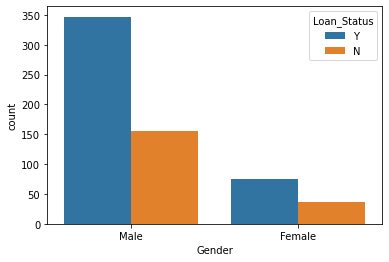

AxesSubplot(0.125,0.125;0.775x0.755)


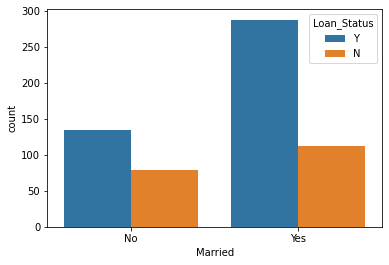

AxesSubplot(0.125,0.125;0.775x0.755)


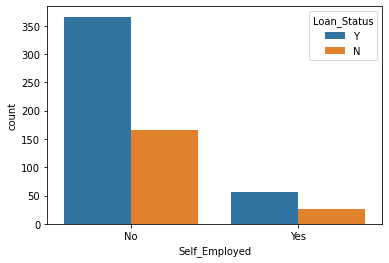

AxesSubplot(0.125,0.125;0.775x0.755)


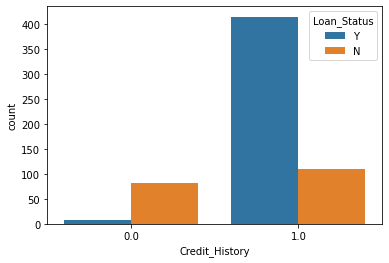

AxesSubplot(0.125,0.125;0.775x0.755)


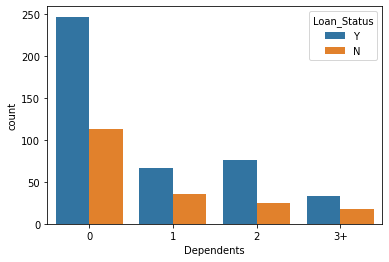

AxesSubplot(0.125,0.125;0.775x0.755)


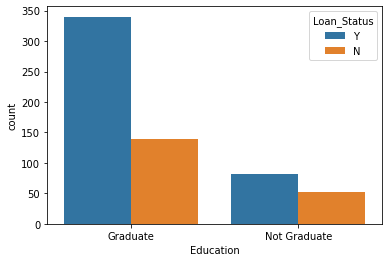

AxesSubplot(0.125,0.125;0.775x0.755)


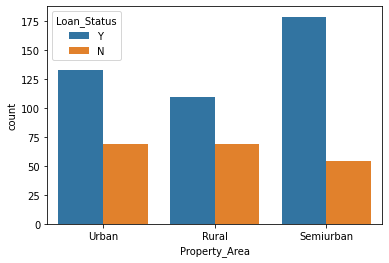

In [24]:

for feature in categorical_features:
    print(sns.countplot(x=feature, data=loan_train, hue='Loan_Status'))
    plt.show()

- Men asking for loans have a higher income than women but the approval rate for men and women is the same
- Married people ask for loan higher than non-married people and that percentage of married people who have got their loan approved is higher when compared to non- married people.
- The applicant who has less number of dependents have a high probability for loan approval.
- The one who is graduate has a better chance of loan approval.
- The number of applicants that have good credit history is higher compared to applicants that have bad credit history. Better credit history will have the higher chance of loan approval.
- Possessing a semiurban area gives you an extra chance of being approved.
- No Self-employed people ask for loan much more than self-employed but there is hardly any correlation between Loan_Status and Self_Employed applicants. 

In this part, I will answer some assumptions:
- The one whose salary is more can have a greater chance of loan approval.
- The one who is graduate has a better chance of loan approval.
- Married people would have a upper hand than unmarried people for loan approval .
- The applicant who has less number of dependents have a high probability for loan approval.
- The lesser the loan amount the higher the chance for getting loan.
- Better credit history will have the higher chance of loan approval. 

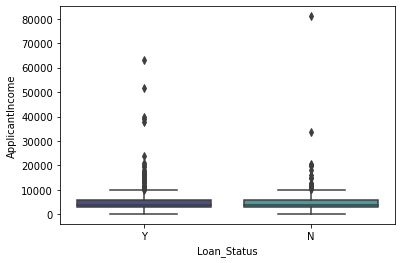

In [25]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=loan_train, palette="mako");

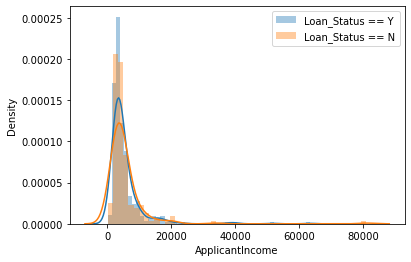

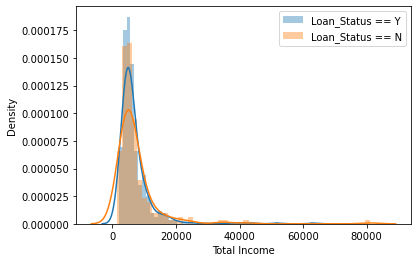

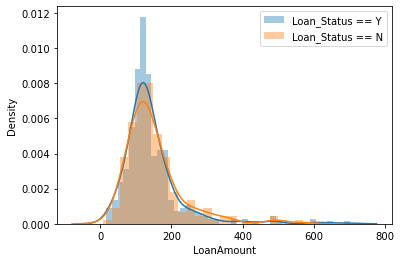

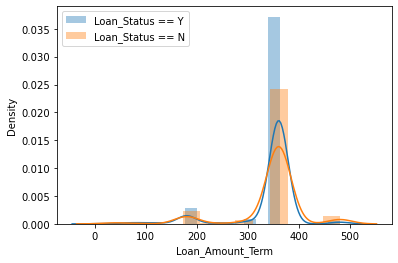

In [26]:
df_approved = loan_train[loan_train['Loan_Status'] == 'Y']
df_rejected = loan_train[loan_train['Loan_Status'] == 'N']


for feature in numeric_features:
    sns.distplot(df_approved[feature][df_approved[feature].isna() == False], label = 'Loan_Status == Y')
    sns.distplot(df_rejected[feature][df_rejected[feature].isna() == False], label = 'Loan_Status == N')
    plt.legend()
    plt.show()

- The applicant's income seems roughly the same for those approved or rejected loans. But the total income for loan approval is bigger than its loan disapproval, we can infer that bonus income is important to the approval rate.
- The loan amount for those rejected loans seems to be bigger. But there are a lot of outliers in both cases, maybe due to other variables like Applicant Income, Co-applicant Income, Education, etc.
- ...

**Correlationships**

Correlation is a measure of association between numerical variables.

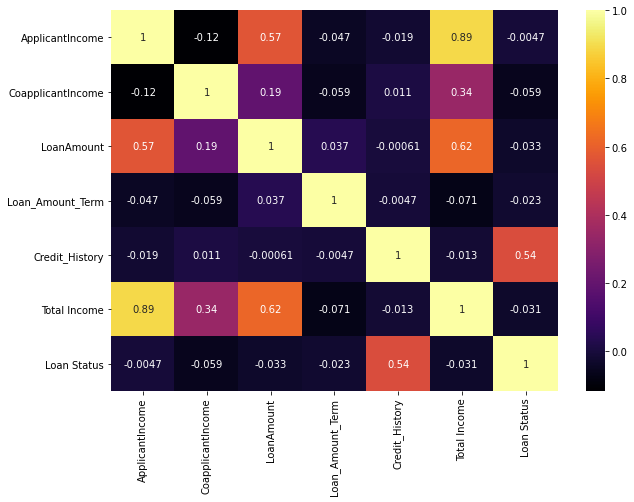

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(loan_train.corr(), annot=True, cmap='inferno');

- Loan Amount is strongly correlated with applicant income and poorly correlated with co-applicant income.
- The applicant and co-applicant incomes are poorly negatively correlated, meaning they’re varying on the opposite, higher applicant income lower co-applicant income.

# 5. Data Preprocessing

 ## Feature Encoding

We’re gonna use sklearn for our models , before doing that we need to turn all the categorical variables into numbers. 
- Ordinal categorical features: Label encoding
- Norminal categorical features: One hot encoding

In [28]:
#Label encoding for train dataset
from sklearn.preprocessing import LabelEncoder
ordinal_category= ['Dependents','Property_Area'] 
encoder= LabelEncoder()
for i in ordinal_category:  
    loan_train[i] = encoder.fit_transform(loan_train[i]) 
loan_train.dtypes

Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status           object
Total Income         float64
Loan Status            int64
dtype: object

In [29]:
#Label encoding for train dataset
from sklearn.preprocessing import LabelEncoder
ordinal_category= ['Dependents','Property_Area'] 
encoder= LabelEncoder()
for i in ordinal_category:  
    loan_test[i] = encoder.fit_transform(loan_test[i]) 
loan_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Total Income           int64
dtype: object

In [30]:
#One hot encoding using get_dummies() for training dataset
nominal_category = ['Gender', 'Married', 'Education', 'Self_Employed']
for i in nominal_category:  
    loan_train[i] = pd.get_dummies(loan_train[i]) 
loan_train.dtypes

Gender                 uint8
Married                uint8
Dependents             int32
Education              uint8
Self_Employed          uint8
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status           object
Total Income         float64
Loan Status            int64
dtype: object

In [31]:
#One hot encoding using get_dummies() for testing dataset
nominal_category = ['Gender', 'Married', 'Education', 'Self_Employed']
for i in nominal_category:  
    loan_test[i] = pd.get_dummies(loan_test[i]) 
loan_test.dtypes

Loan_ID               object
Gender                 uint8
Married                uint8
Dependents             int32
Education              uint8
Self_Employed          uint8
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Total Income           int64
dtype: object

In [32]:
loan_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income,Loan Status
0,0,1,0,1,1,5849,0.0,128.0,360.0,1.0,2,Y,5849.0,1
1,0,0,1,1,1,4583,1508.0,128.0,360.0,1.0,0,N,6091.0,0
2,0,0,0,1,0,3000,0.0,66.0,360.0,1.0,2,Y,3000.0,1
3,0,0,0,0,1,2583,2358.0,120.0,360.0,1.0,2,Y,4941.0,1
4,0,1,0,1,1,6000,0.0,141.0,360.0,1.0,2,Y,6000.0,1


## Feature Engineering

### Deal with outliers

Next we have to handle the outliers , one solution is just to remove and we can use log transformation. Let's make a copy of the orginal to see which one is better.  


In [33]:
loan_train_ML=loan_train.copy()
loan_test_ML=loan_test.copy()

In [34]:
#remove outliers from loan train set
Q1 = loan_train_ML.quantile(0.25)
Q3 = loan_train_ML.quantile(0.75)
IQR = Q3 - Q1

loan_train_ML = loan_train_ML[~((loan_train_ML < (Q1 - 1.5 * IQR)) |(loan_train_ML > (Q3 + 1.5 * IQR))).any(axis=1)]

In [35]:
#remove outliers from loan test set
Q1 = loan_test_ML.quantile(0.25)
Q3 = loan_test_ML.quantile(0.75)
IQR = Q3 - Q1
loan_test_ML = loan_test_ML[~((loan_test_ML < (Q1 - 1.5 * IQR)) |(loan_test_ML > (Q3 + 1.5 * IQR))).any(axis=1)]

In [36]:
loan_train_ML.shape

(207, 14)

In [37]:
loan_test_ML.shape

(125, 13)

We can see that 2/3 data was removed from the dataset after removing outliers, which is not good. Now we try log transfomation. It can be easily done via Numpy, just by calling the log() function on the desired column. We only need to log transform with features being seriosly skew right in EDA. 

In [38]:
#log transform with training set
loan_train['Loan_Amount_log']=np.log(loan_train['LoanAmount'])
loan_train['Total_Income_log']=np.log(loan_train['Total Income'])

In [39]:
#log transform with test set
loan_test['Loan_Amount_log']=np.log(loan_train['LoanAmount'])
loan_test['Total_Income_log']=np.log(loan_train['Total Income'])

Let's check with histogram plot to see whether it is right skew or not. 

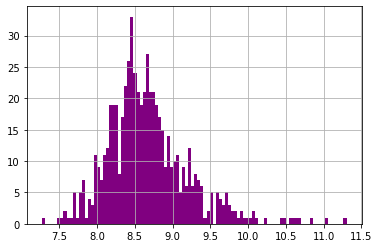

In [40]:
loan_train["Total_Income_log"].hist(bins=100, color="purple")
plt.show()

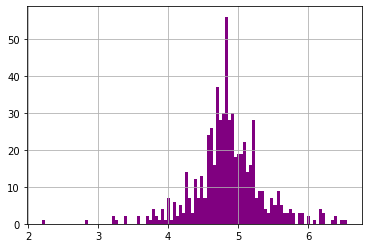

In [41]:
loan_train["Loan_Amount_log"].hist(bins=100, color="purple")
plt.show()

Yes, seem it works out, more normal distribution. 


### Deal with Data Imbalance

In EDA, it can be seen that the number between approved and rejected loan is imbalanced. In this section, oversampling technique will be used to avoid overfitting. Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model. And always split into test and train sets BEFORE trying oversampling techniques!

Now we will train the model on the training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We will use the train_test_split function from sklearn to divide our train dataset. So, first, let us import train_test_split.

Let's separate the features from the labels - we'll call the features **X** and the label **y**:

In [42]:
loan_train.shape

(614, 16)

In [43]:
loan_test.shape

(367, 15)

In [44]:
# Separate features and labels
features = ['Gender','Married','Dependents','Education','Self_Employed','Total_Income_log','Loan_Amount_log','Loan_Amount_Term', 'Credit_History', 'Property_Area']
label = 'Loan Status'
X, y = loan_train[features].values, loan_train[label].values

In [45]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nValidation cases: %d' % (X_train.shape[0], X_test.shape[0]))


Training cases: 429
Validation cases: 185


In [46]:
X, y = SMOTE().fit_resample(X, y)

In [47]:
#check the number of target variable after oversampling using SMOTE
from collections import Counter
print('Resample dataset shape', Counter(y))

Resample dataset shape Counter({1: 422, 0: 422})


It can be seen that the distrubtion of Loan status are now balanced.

### Feature Scaling

Feature scaling improves significantly the performance of some Machine learning algorithms and the most commonly used scaling techniques are:

- Normalization: values are shifted so that they endup between a range as [-1, 1] or [0, 1] etc.
- Standardization:  values are centred around mean with a unit standard deviation i.e. µ = 0 and square of σ = 1

Because in EDA, we realize that distribution of our data is not normal, therefore, we will use Normalization to scale data. 

In [48]:
X = MinMaxScaler().fit_transform(X)

Ok, so we're done with data preprocessing. 

# 6. Building models & Evaluation

## Logistic Regression

There are various algorithms we can use to train the model. Firstly, we'll use Logistic Regression, which (despite its name) is a well-established algorithm for classification. In addition to the training features and labels, we'll need to set a regularization parameter. This is used to counteract any bias in the sample, and help the model generalize well by avoiding overfitting the model to the training data.

In [49]:
# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


Now we've trained the model using the training data, we can use the validation data we held back to evaluate how well it predicts.

In [50]:
y_pred = model.predict(X_test)
print('Predicted labels: ', y_pred[:5])
print('Actual labels:    ' ,y_test[:5])

Predicted labels:  [1 1 1 1 1]
Actual labels:     [1 0 1 0 1]


Let's check the accuracy of the predictions - in simple terms, what proportion of the labels did the model predict correctly?

In [51]:
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.827027027027027


Accuracy seems like a sensible metric to evaluate, but you need to be careful about drawing too many conclusions from the accuracy of a classifier. Let's check with confusion matrix and classification report. 

Text(91.68, 0.5, 'Predicted')

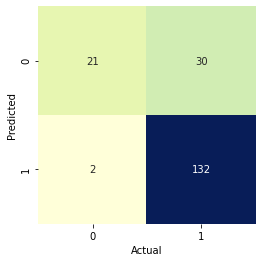

In [52]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



In [54]:
# retrieve the precision_score and recall_score metrics
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, y_pred))
print("Overall Recall:",recall_score(y_test, y_pred))

Overall Precision: 0.8148148148148148
Overall Recall: 0.9850746268656716


 Statistical machine learning algorithms, like logistic regression, are based on probability; so what actually gets predicted by a binary classifier is the probability that the label is true (P(y)) and the probability that the label is false (1 - P(y)). A threshold value of 0.5 is used to decide whether the predicted label is a 1 (P(y) > 0.5) or a 0 (P(y) <= 0.5). We use the predict_proba method to see the probability pairs for each case:

In [55]:
y_scores = model.predict_proba(X_test)
print(y_scores[:10])

[[0.22200616 0.77799384]
 [0.27511352 0.72488648]
 [0.25045914 0.74954086]
 [0.15698436 0.84301564]
 [0.13261742 0.86738258]
 [0.96809169 0.03190831]
 [0.16664666 0.83335334]
 [0.37997163 0.62002837]
 [0.94881599 0.05118401]
 [0.19867896 0.80132104]]


A common way to evaluate a classifier is to examine the true positive rate (which is another name for recall) and the false positive rate for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a received operator characteristic (ROC) chart, like this:

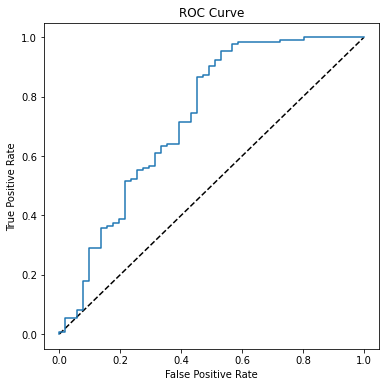

In [56]:
from sklearn.metrics import roc_curve
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model.

In [57]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.7291483757682178


Now let's try a different algorithm. Previously we used a logistic regression algorithm, which is a linear algorithm. There are many kinds of classification algorithm we could try, including:

- Support Vector Machine algorithms: Algorithms that define a hyperplane that separates classes.
- Tree-based algorithms: Algorithms that build a decision tree to reach a prediction
- Ensemble algorithms: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.

## Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 1000)

# fit the pipeline to train a random forest model on the training set
model_RF = RF.fit(X_train, (y_train))
print (model_RF)

RandomForestClassifier(n_estimators=1000)


Confusion Matrix:
 [[ 23  28]
 [ 10 124]] 

Accuracy: 0.7945945945945946
Overall Precision: 0.8157894736842105
Overall Recall: 0.9253731343283582

AUC: 0.7584869768803043


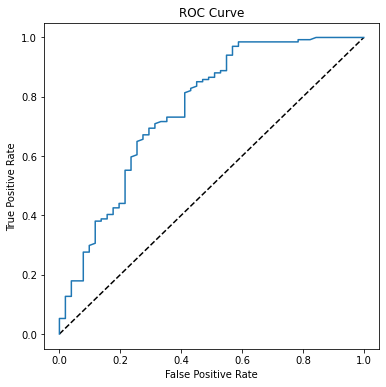

In [59]:
y_pred_RF = model_RF.predict(X_test)
y_scores_RF = model_RF.predict_proba(X_test)
cm = confusion_matrix(y_test,y_pred_RF)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, y_pred_RF))
print("Overall Precision:",precision_score(y_test, y_pred_RF))
print("Overall Recall:",recall_score(y_test, y_pred_RF))
auc = roc_auc_score(y_test,y_scores_RF[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_RF[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In general, the evaluation metrics of logistic model is a little bit better than Random Forest, so we can choose the first one. 

# Model Deployment

In [60]:
X_test_1 = loan_test[['Gender','Married','Dependents','Education','Self_Employed','Total_Income_log','Loan_Amount_log','Loan_Amount_Term', 'Credit_History', 'Property_Area']].values

In [61]:
model.fit(X, y)

predictions= model.predict(X_test_1)
result = pd.DataFrame({"Loan_ID": loan_test['Loan_ID'], "Loan Status": predictions})
print(result.head())

    Loan_ID  Loan Status
0  LP001015            1
1  LP001022            1
2  LP001031            1
3  LP001035            1
4  LP001051            1


In [62]:
pd.DataFrame(result).to_csv("loan_prediction_by_Emma.csv", index=False)